# K Nearest Neighbors

This notebook uses scikit-learn's knn model to train classifiers to associate images of peoples' faces and images of handwritten digits.

In [1]:
# import libraries
import numpy as np
from scipy.io import loadmat
from scipy.stats import mode

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# settings
seed = 421
np.random.seed(seed)

In [3]:
def loaddata(filename):
    """
    This function returns X,y training and testing data from the given filename.
    This function is designed for the faces.mat and digits.mat data files.
    
    Inputs:
    ------
    filename : the face dataset
    
    Outputs:
    -------
    X_train : numpy training feature array
    X_test  : numpy testing feature array
    y_train : numpy training labels
    y_test  : numpy testing labels
    """
    data = loadmat(filename)
    X_train = data['xTr']
    y_train = np.round(data['yTr'])
    X_test  = data['xTe']
    y_test  = np.round(data['yTe'])
    
    return X_train.T, y_train.T, X_test.T, y_test.T

<Figure size 792x576 with 0 Axes>

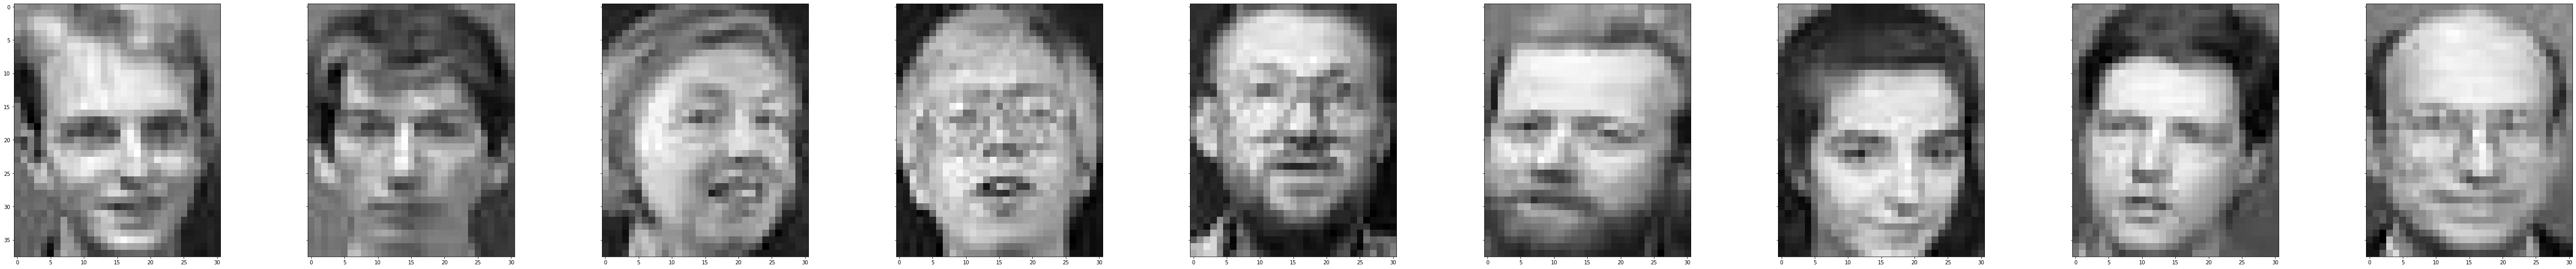

In [5]:
X_train, y_train, X_test, y_test = loaddata('../data/faces.mat')

def plotdata(X, xdim=38, ydim=31):
    n, d = X.shape
    f, axes = plt.subplots(1, n, sharey=True)
    f.set_figwidth(10 * n)
    f.set_figheight(n)
    
    if n > 1:
        for i in range(n):
            axes[i].imshow(X[i,:].reshape(ydim, xdim).T, cmap=plt.cm.binary_r)
    else:
        axes.imshow(X[0,:].reshape(ydim, xdim).T, cmap=plt.cm.binary_r)

plt.figure(figsize=(11,8))
plotdata(X_train[:9,:])

In [6]:
# get unique face labels
print(np.unique(y_train))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [7]:
def subsetdata(X, y, c):
    """
    This function returns the X features for y == class c.
    
    Inputs:
    ------
    X : numpy feature array
    y : numpy labels array
    c : class label
    """
    mask = np.squeeze(y == c)
    sample = X[mask,:]
    
    return sample

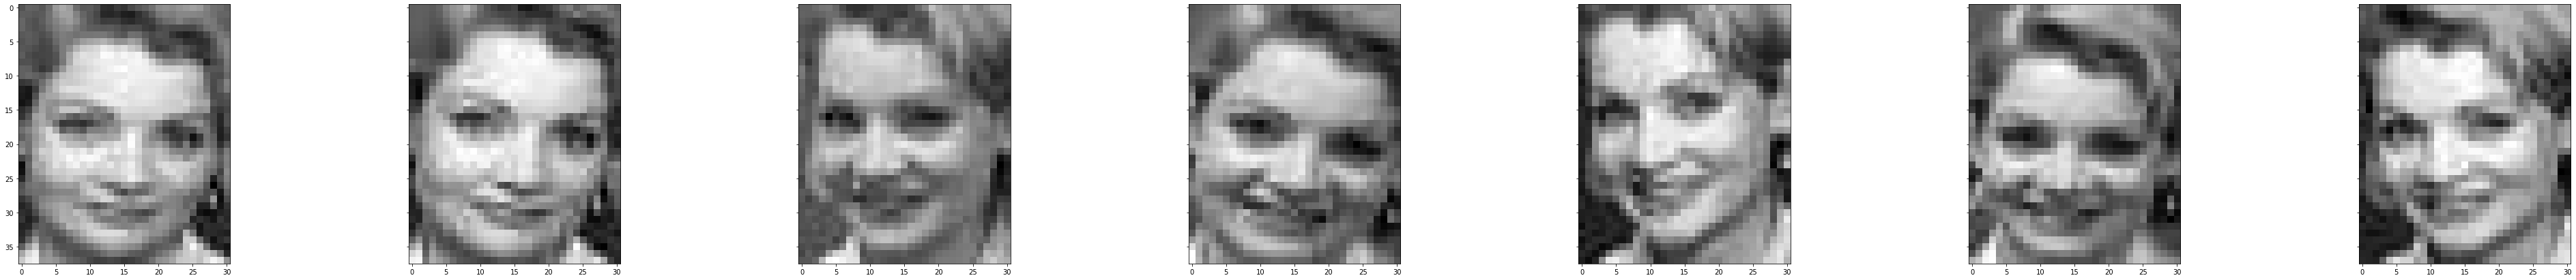

In [8]:
# test function
sample = subsetdata(X_train, y_train, 35)
plotdata(sample)

In [9]:
# import sklearn model
from sklearn.neighbors import KNeighborsClassifier

# build and fit a k=1 nearest neighbor model
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train.ravel())

In [10]:
# import scoring function
from sklearn.metrics import accuracy_score

# get the performance on the test data
score = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy score = {:.2%}'.format(score))

Accuracy score = 95.83%


Actual class = 1 Predictions = [1 1 1]
Actual class = 11 Predictions = [11 11 11]
Actual class = 21 Predictions = [21 21 21]
Actual class = 31 Predictions = [31 31 31]


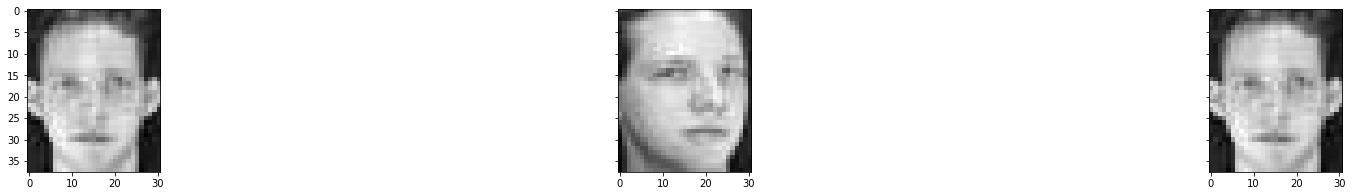

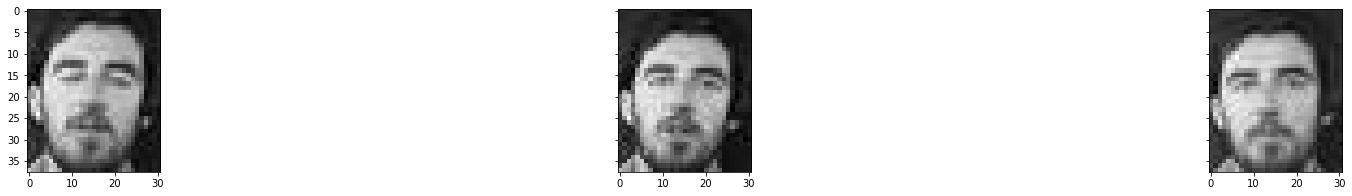

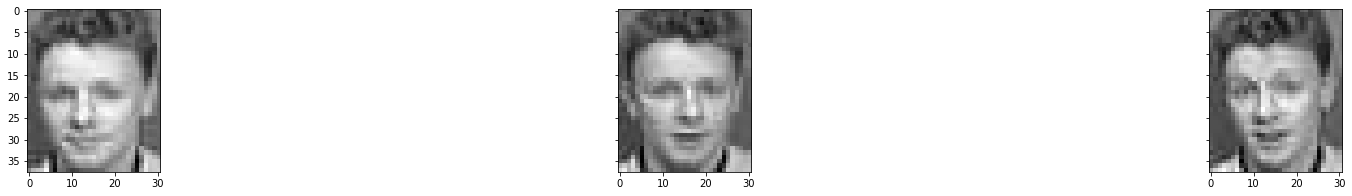

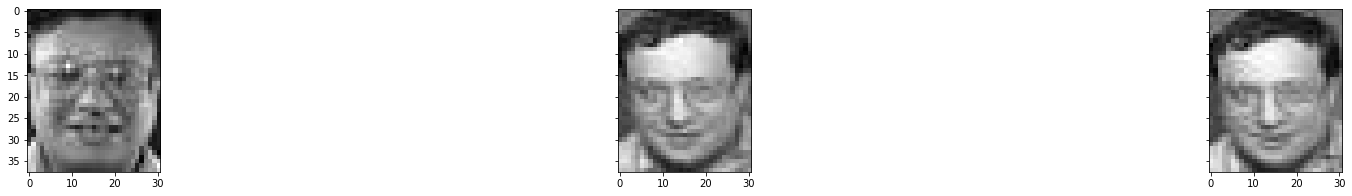

In [11]:
# see performance for a few cases
for c in range(1, 40, 10):
    sample = subsetdata(X_test, y_test, c)
    preds = clf.predict(sample)
    print(f'Actual class = {c} Predictions = {preds}')
    plotdata(sample)

## Repeat the process with the digit data

<Figure size 792x576 with 0 Axes>

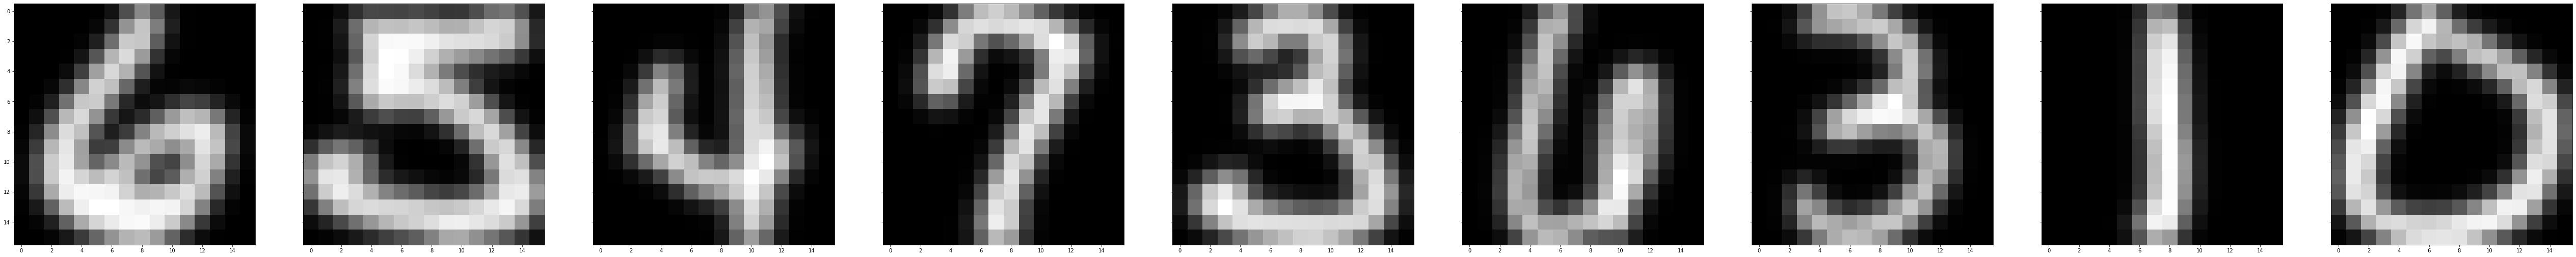

In [12]:
# load the training and testing sets
X_train, y_train, X_test, y_test = loaddata('../data/digits.mat')

# preview some samples
plt.figure(figsize=(11,8))
plotdata(X_train[:9,:], ydim=16, xdim=16)

In [13]:
# get the class labels
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


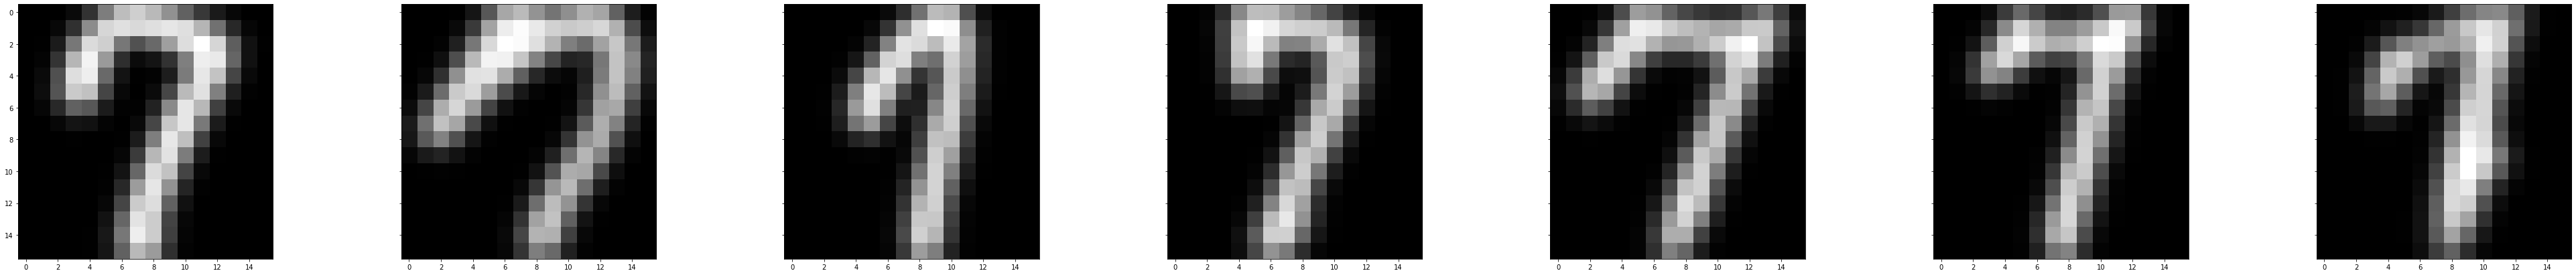

In [14]:
# preview '7' images
sample = subsetdata(X_train, y_train, 7)
plotdata(sample[:7], ydim=16, xdim=16)

In [15]:
# make and fit an instance of a knn model with k=1
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train.ravel())

# compute and print accuracy on test set
score = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy score = {:.2%}'.format(score))

Accuracy score = 95.02%


Actual class = 0 Predictions = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual class = 4 Predictions = [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 9 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 9 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 2 4 4 4 4 4 4 4 4 4 4 

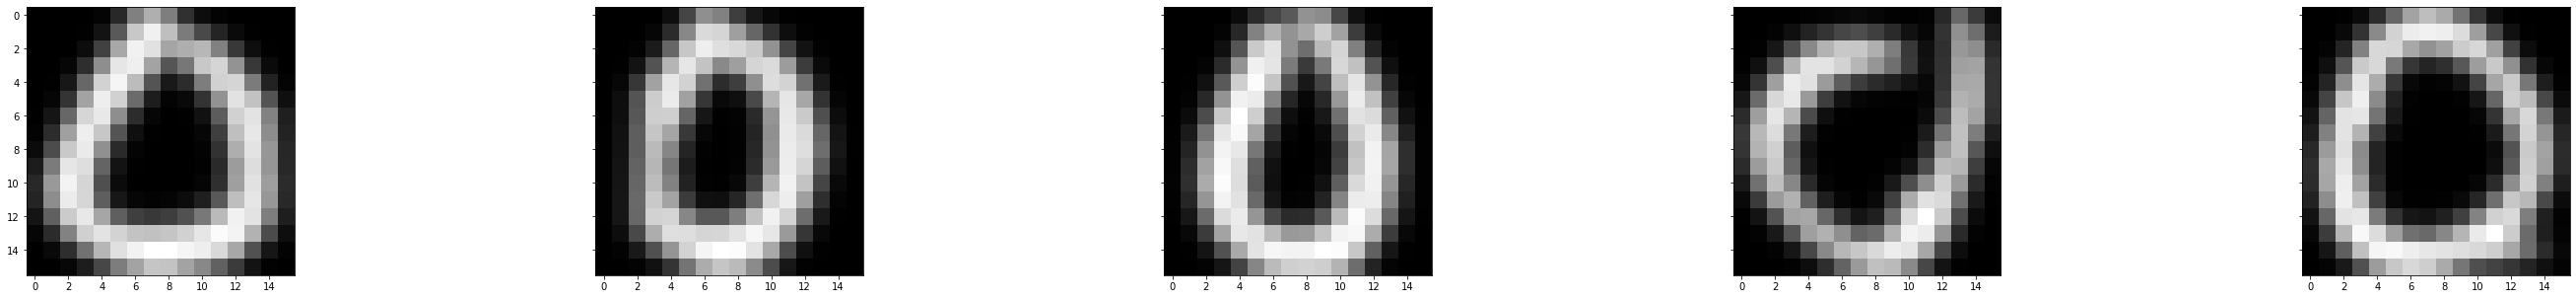

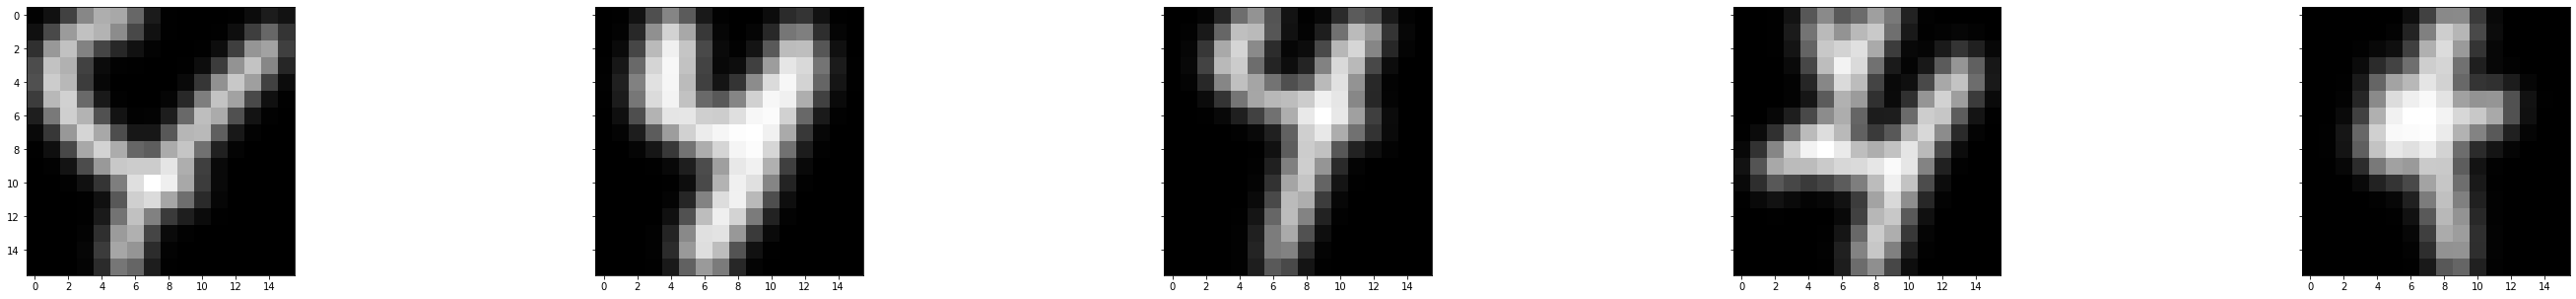

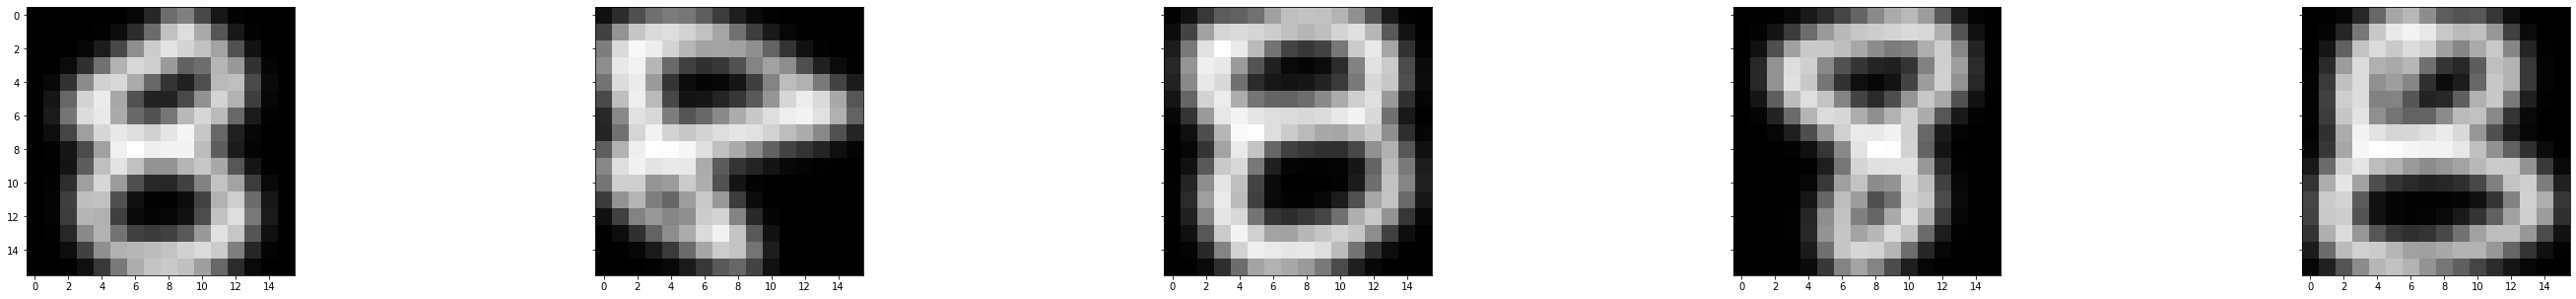

In [16]:
# see performance
for c in range(0, 9, 4):
    sample = subsetdata(X_test, y_test, c)
    preds = clf.predict(sample)
    print(f'Actual class = {c} Predictions = {preds}')
    plotdata(sample[:5], ydim=16, xdim=16)